In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [3]:
dataset = pd.read_csv(url, names = ['sepal_length','sepal_width','petal_length','petal_width','Class'],index_col=None)

In [4]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
X = dataset.drop(['Class'],axis=1)
y = dataset['Class']

In [33]:
le = LabelEncoder()
y = le.fit_transform(y) #will transform the classes into numbers

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

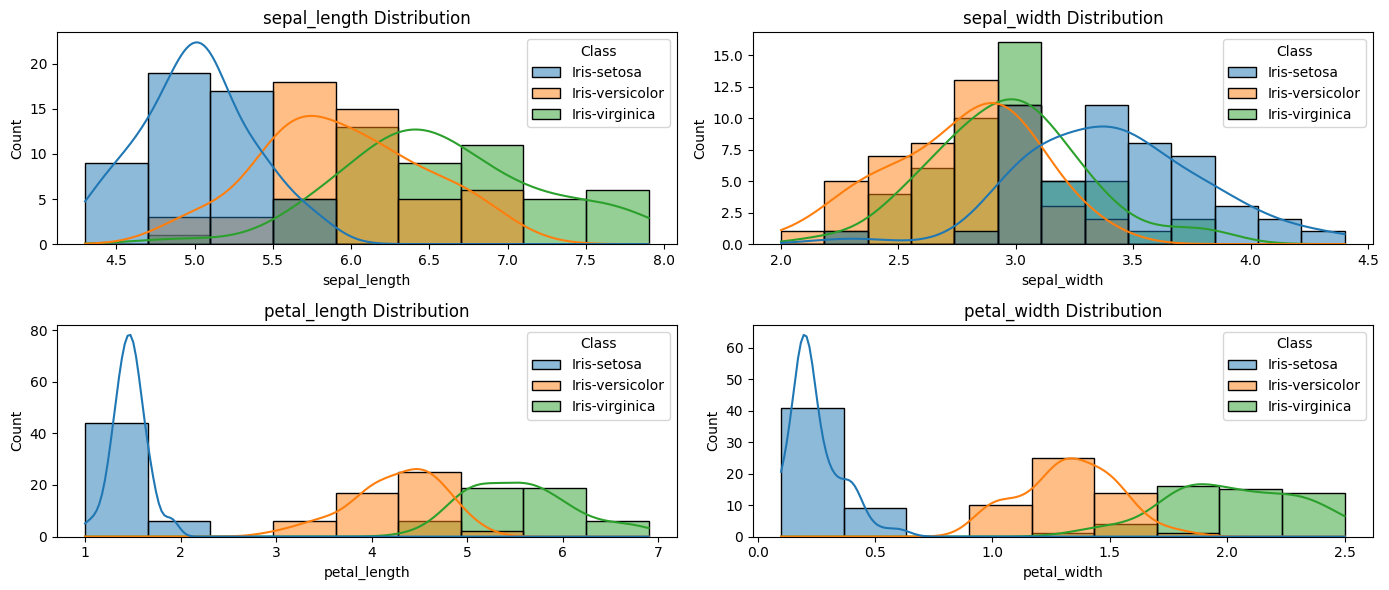

In [35]:
plt.figure(figsize=(14,6))

for i, feature in enumerate(['sepal_length','sepal_width','petal_length','petal_width']):
  plt.subplot(2,2,i+1)
  sns.histplot(data=dataset, x=feature, hue='Class',kde=True)
  plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

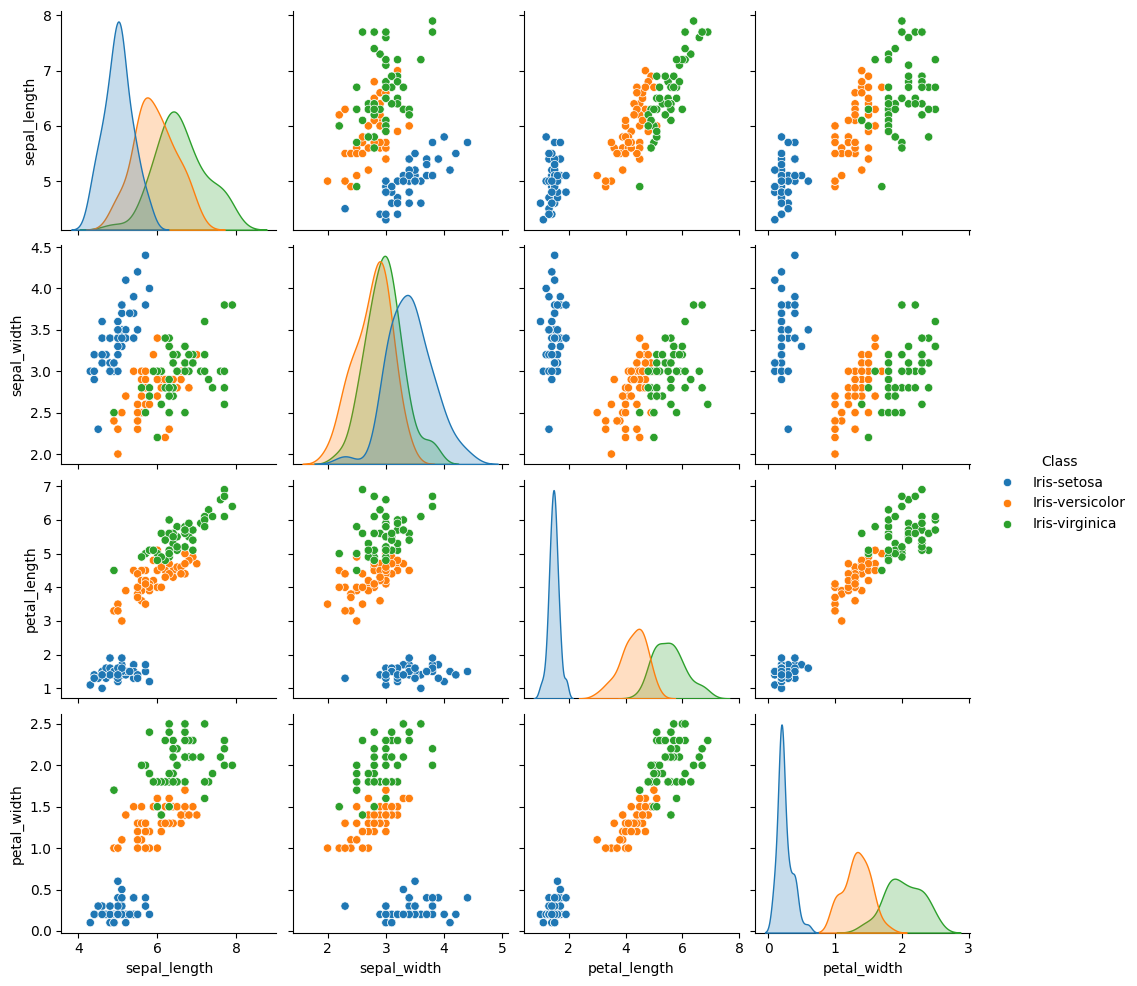

In [12]:
sns.pairplot(data = dataset,hue = 'Class')


In [36]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state= 101)

In [37]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [38]:
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [39]:
log_model = LogisticRegression()

In [46]:
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [48]:
confusion_matrix(y_pred,y_test) #100% accuracy

array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]])